# seaborn.kdeplot() 详细介绍

`seaborn.kdeplot()` 是 Seaborn 库中用于绘制核密度估计图(Kernel Density Estimation plot)的函数。核密度估计是一种非参数方法，用于估计随机变量的概率密度函数。

## 基本语法

```python
seaborn.kdeplot(data, data2=None, shade=False, vertical=False, 
                kernel='gau', bw='scott', gridsize=100, cut=3, 
                clip=None, legend=True, cumulative=False, 
                shade_lowest=True, cbar=False, cbar_ax=None, 
                cbar_kws=None, ax=None, **kwargs)
```

## 主要参数说明

### 数据相关参数
- `data`: 输入数据，可以是一维数组、列表、Series 或 DataFrame 的列
- `data2`: 第二维数据，用于绘制双变量 KDE
- `vertical`: 如果为 True，则绘制垂直方向的密度图

### 核密度估计参数
- `kernel`: 核函数类型，可选 'gau'(高斯核)、'cos'(余弦核)、'biw'(双权重核)、'epa'(Epanechnikov核)、'tri'(三角核)、'triw'(三角权重核)
- `bw`: 带宽方法或带宽大小，控制平滑程度。可选 'scott'、'silverman' 或标量值
- `gridsize`: 计算核密度估计的网格点数
- `cut`: 从极端数据点绘制估计值的距离，以带宽为单位

### 图形样式参数
- `shade`: 是否填充密度曲线下方的区域
- `color`: 设置曲线颜色
- `alpha`: 设置透明度
- `linewidth`: 设置线宽
- `linestyle`: 设置线型

### 其他参数
- `cumulative`: 是否绘制累积分布
- `legend`: 是否显示图例
- `ax`: 指定绘图的 matplotlib Axes 对象

## 使用示例

### 1. 基本单变量 KDE 图

```python
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据
data = np.random.randn(100)

# 绘制基本KDE图
sns.kdeplot(data)
plt.show()
```

### 2. 填充颜色和调整带宽

```python
sns.kdeplot(data, shade=True, bw=0.2, color="red")
plt.show()
```

### 3. 双变量 KDE 图

```python
data1 = np.random.randn(100)
data2 = data1 + np.random.randn(100) * 0.5

sns.kdeplot(data1, data2, shade=True)
plt.show()
```

### 4. 累积分布图

```python
sns.kdeplot(data, cumulative=True)
plt.show()
```

### 5. 在DataFrame上使用

```python
import pandas as pd

df = pd.DataFrame({'A': np.random.randn(100),
                   'B': np.random.randn(100) + 2})

sns.kdeplot(df['A'], label='A')
sns.kdeplot(df['B'], label='B')
plt.legend()
plt.show()
```

## 高级用法

### 1. 条件着色

```python
tips = sns.load_dataset("tips")
sns.kdeplot(tips["total_bill"], 
            shade=True, 
            color="blue", 
            label="Total Bill")
sns.kdeplot(tips["tip"], 
            shade=True, 
            color="orange", 
            label="Tip")
plt.legend()
plt.show()
```

### 2. 分层 KDE

```python
iris = sns.load_dataset("iris")
sns.kdeplot(iris.loc[iris['species'] == 'setosa', 'sepal_width'], 
            label='setosa')
sns.kdeplot(iris.loc[iris['species'] == 'versicolor', 'sepal_width'], 
            label='versicolor')
sns.kdeplot(iris.loc[iris['species'] == 'virginica', 'sepal_width'], 
            label='virginica')
plt.legend()
plt.show()
```

### 3. 使用 `hue` 参数

```python
sns.kdeplot(data=iris, x='sepal_width', hue='species', shade=True)
plt.show()
```

## 注意事项

1. KDE 图对于理解数据的分布形状很有用，但要注意带宽的选择会影响结果
2. 对于小数据集，KDE 可能不太准确
3. 对于多峰分布，KDE 可以很好地展示出多个峰值
4. 与直方图相比，KDE 提供了更平滑的分布表示

核密度估计图是探索性数据分析中非常有用的工具，可以帮助我们直观理解数据的概率分布特征。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

这段代码使用 Seaborn 和 Matplotlib 创建了一个双变量核密度估计(KDE)的等高线图，用于可视化鸢尾花数据集中两个不同物种的萼片宽度和长度的联合分布。

,sepal_length,sepal_width,petal_length,petal_width,species
116,6.5,3.0,5.5,1.8,virginica
49,5.0,3.3,1.4,0.2,setosa
72,6.3,2.5,4.9,1.5,versicolor
117,7.7,3.8,6.7,2.2,virginica
94,5.6,2.7,4.2,1.3,versicolor
40,5.0,3.5,1.3,0.3,setosa
24,4.8,3.4,1.9,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
137,6.4,3.1,5.5,1.8,virginica
70,5.9,3.2,4.8,1.8,versicolor


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

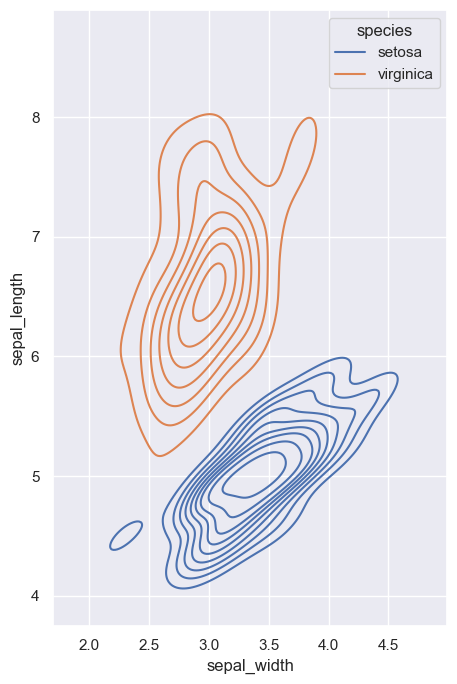

In [ ]:
sns.set_theme(style="darkgrid")
iris = pd.read_csv("seaborn-data/iris.csv")
display(iris.sample(10))

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"), # 筛选数据，只包含非"versicolor"的物种(setosa和virginica)
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,      # 设置显示等高线的最低密度阈值(0到1之间)，低于此值的区域不显示
)

可视化效果解读
- 两个不同的颜色区域/等高线，分别代表setosa和virginica两个物种
- 每个物种的萼片宽度和长度的联合分布
- 等高线越密集的区域表示数据点越集中
- 由于设置了thresh=.1，只有密度高于0.1的区域才会显示

这段代码使用 Seaborn 和 Matplotlib 创建了一个 3×3 的网格图，展示了不同参数下的双变量核密度估计(KDE)图，使用了 cubehelix 调色板来生成渐变色。

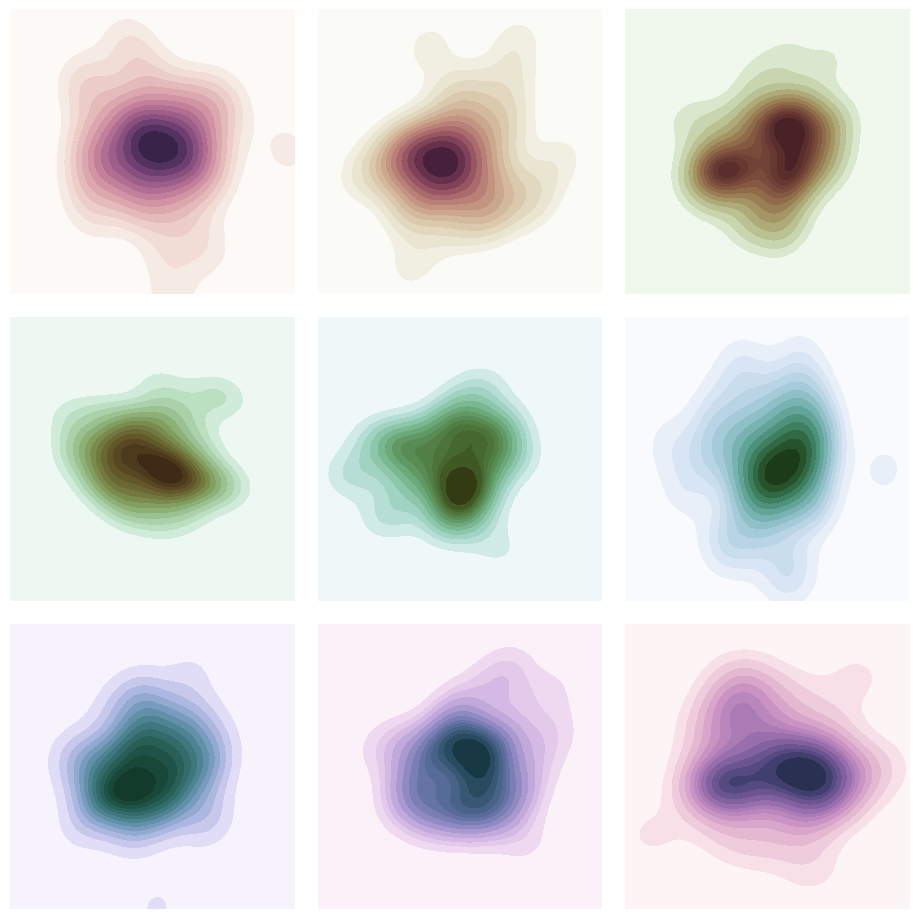

In [ ]:
sns.set_theme(style="white")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# 循环绘制 9 个 KDE 图
# axes.flat：将 axes（3×3 数组）展平为 1D 数组，方便遍历。
# np.linspace(0, 3, 10)：生成 10 个均匀分布的值（0 到 3），用于控制 cubehelix 调色板的起始色相（start 参数）。
# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):
    # 生成一个 cubehelix 调色板（一种感知均匀的渐变色）
    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # 生成随机数据并绘制 KDE 图
    # Generate and plot a random bivariate dataset
    x, y = rs.normal(size=(2, 50))  # 生成 50 个服从标准正态分布的随机点（x 和 y 各 50 个）
    sns.kdeplot(
        x=x, y=y,
        cmap=cmap, fill=True,
        clip=(-5, 5),   # 指定核密度估计（KDE）的计算范围，超出该范围的数据会被"截断"，避免极端值对 KDE 估计造成影响。
        cut=10,
        thresh=0, levels=15,
        ax=ax,
    )
    ax.set_axis_off()   # 关闭当前子图的坐标轴（使图形更简洁，专注于 KDE 形状）

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
# 调整子图布局：
#     left=0, bottom=0, right=1, top=1：子图填充整个图形区域。
#     wspace=0.08, hspace=0.08：子图之间的水平和垂直间距为 0.08（默认通常更大）。
f.subplots_adjust(0, 0, 1, 1, .08, .08)